# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: Multilayer ANNs

USANDO TENSORFLOW

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

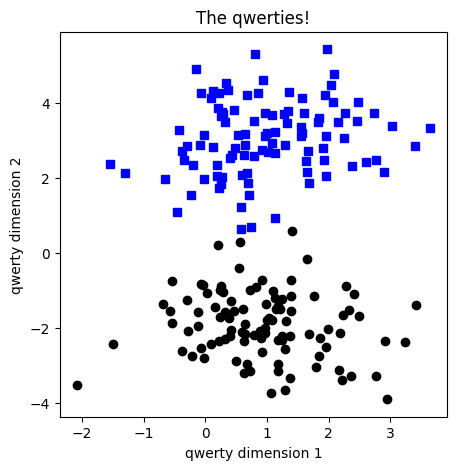

In [2]:
# Create data
nPerClust = 100
blur = 1
A = [1, 3]
B = [1, -2]

# Generate data
a = [A[0] + np.random.randn(nPerClust) * blur, A[1] + np.random.randn(nPerClust) * blur]
b = [B[0] + np.random.randn(nPerClust) * blur, B[1] + np.random.randn(nPerClust) * blur]

# True labels
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

# Concatenate into a matrix
data_np = np.hstack((a, b)).T

# Convert to a TensorFlow tensor
data = tf.convert_to_tensor(data_np, dtype=tf.float32)
labels = tf.convert_to_tensor(labels_np, dtype=tf.float32)

# Show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(data_np[np.where(labels_np == 0)[0], 0], data_np[np.where(labels_np == 0)[0], 1], 'bs')
plt.plot(data_np[np.where(labels_np == 1)[0], 0], data_np[np.where(labels_np == 1)[0], 1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# Functions to build and train the model

In [3]:
def createANNmodel(learningRate):
    # Model architecture
    ANNclassify = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
        tf.keras.layers.Dense(1, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile model
    optimizer = tf.keras.optimizers.SGD(learningRate)
    lossfun = tf.keras.losses.BinaryCrossentropy()

    return ANNclassify, lossfun, optimizer

In [6]:
# A function that trains the model
numepochs = 1000

def trainTheModel(ANNmodel):
    losses = []

    for epochi in range(numepochs):
        with tf.GradientTape() as tape:
            yHat = ANNmodel(data)
            loss = lossfun(labels, yHat)
            losses.append(loss.numpy())

        gradients = tape.gradient(loss, ANNmodel.trainable_variables)
        optimizer.apply_gradients(zip(gradients, ANNmodel.trainable_variables))

    # Final forward pass
    predictions = ANNmodel(data)
    # Convert predictions to boolean tensors
    pred_labels = tf.cast(predictions > 0.5, tf.float32)
    totalacc = 100 * tf.reduce_mean(tf.cast(tf.equal(pred_labels, labels), tf.float32))

    return losses, predictions, totalacc

# Test the new code by running it once

Final accuracy: 99.0%


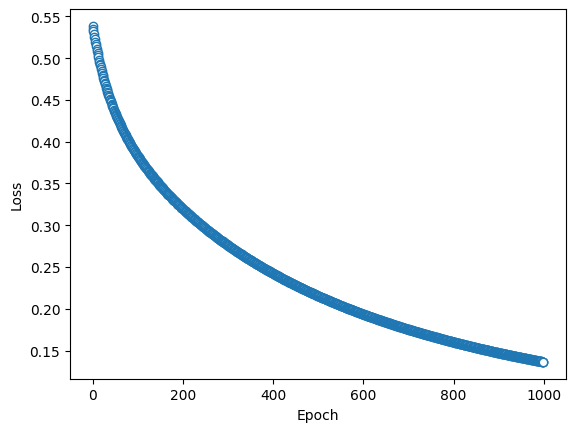

In [7]:
# Create everything
ANNclassify, lossfun, optimizer = createANNmodel(0.01)

# Run it
losses, predictions, totalacc = trainTheModel(ANNclassify)

# Report accuracy
print('Final accuracy: {}%'.format(totalacc))

# Show the losses
plt.plot(losses, 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Now for the real test (varying learning rates)

In [8]:
# Learning rates
learningrates = np.linspace(0.001, 0.1, 50)

# Initialize
accByLR = []
allLosses = np.zeros((len(learningrates), numepochs))

# The loop
for i, lr in enumerate(learningrates):
    # Create and run the model
    ANNclassify, lossfun, optimizer = createANNmodel(lr)
    losses, _, totalacc = trainTheModel(ANNclassify)

    # Store the results
    accByLR.append(totalacc)
    allLosses[i, :] = losses

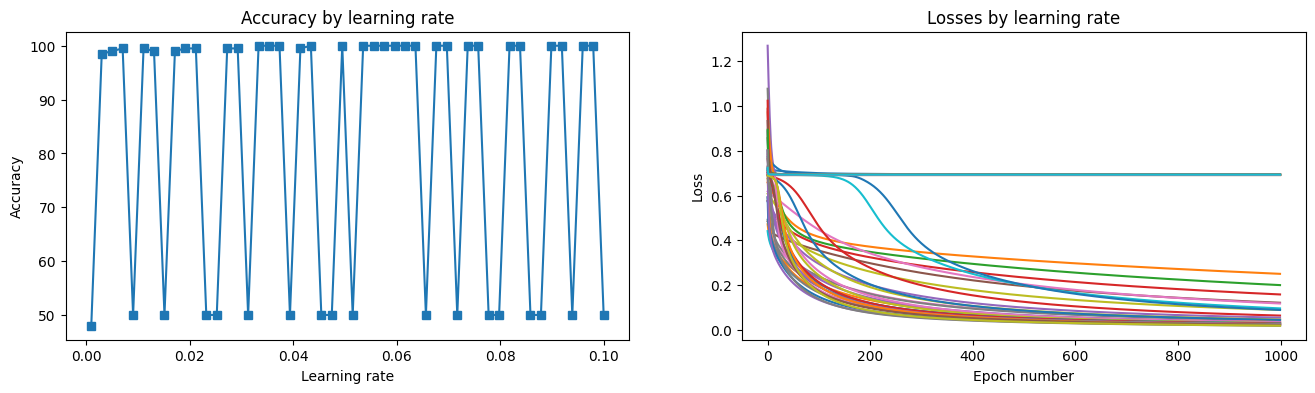

In [9]:
# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(learningrates, accByLR, 's-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()